In [2]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits
from astropy import units as u
from specutils import Spectrum1D
import glob

In [5]:
#Glob all the spectra files
spectra_dir="/home/kevin/aufklarung_astro_station/sdss_spectra/"
spectra_paths=glob.glob(spectra_dir+"*.fits")

In [15]:
#Open all the spectra files and store them in a list
spectra_list=[]
for spec_files in spectra_paths:
    with fits.open(spec_files) as f:
        spec=f[1].data
        header=f[0].header
    spectra_list.append(spec)



In [35]:
#Get the shapes of each spectra then find the smallest shape along 0 axis
spec_shape_list=[]
for i in spectra_list:
    print(i.shape)
    spec_shape_list.append(i.shape)

spec_shape_list=np.array(spec_shape_list)
smallest_spec=np.min(spec_shape_list)

(3822,)
(3822,)
(3828,)
(3846,)
(3769,)


In [39]:
#Reshape all the spectra so they are of the shape of the original spectra of lowest shape
spectra_list_resized=[]
for j in spectra_list:
    j=j[:smallest_spec]
    print(j.shape)
    spectra_list_resized.append(j)

(3769,)
(3769,)
(3769,)
(3769,)
(3769,)


In [44]:
spectra_list_resized=np.array(spectra_list_resized)
spectra_list_resized=spectra_list_resized.reshape(spectra_list_resized.shape[1],
                                                 spectra_list_resized.shape[0])

In [48]:
spectra_list_resized

array([[( 1.27920818e+01, 3.5817, 0.10687421, 0,       0, 1.2967558 , 13.418482 , 12.464617  ),
        ( 7.44927549e+00, 3.5818, 0.11202636, 0,       0, 1.2965097 , 13.370382 , 13.004056  ),
        ( 9.73167229e+00, 3.5819, 0.1062034 , 0,       0, 1.2962604 , 12.977432 , 12.24745   ),
        ...,
        ( 1.48286505e+01, 3.9583, 0.95507324, 0,       0, 0.7769971 ,  1.873131 , 12.828309  ),
        ( 1.47561693e+01, 3.9584, 0.955643  , 0,       0, 0.77744174,  3.0043972, 12.893665  ),
        ( 1.56789837e+01, 3.9585, 0.9004053 , 0,       0, 0.7778833 ,  2.6854935, 13.028144  )],
       [( 1.27920818e+01, 3.5817, 0.10687421, 0,       0, 1.2967558 , 13.418482 , 12.464617  ),
        ( 7.44927549e+00, 3.5818, 0.11202636, 0,       0, 1.2965097 , 13.370382 , 13.004056  ),
        ( 9.73167229e+00, 3.5819, 0.1062034 , 0,       0, 1.2962604 , 12.977432 , 12.24745   ),
        ...,
        ( 1.48286505e+01, 3.9583, 0.95507324, 0,       0, 0.7769971 ,  1.873131 , 12.828309  ),
        ( 1.4

Text(0.5, 0, 'Freq')

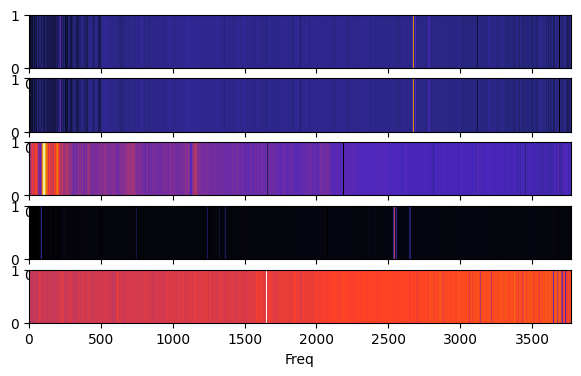

In [191]:
#spectra_list_resized[0]['flux'][:,None] this adds another axis to the individualspectra to make it two dimensional
fig,ax=plt.subplots(nrows=5, ncols=1, figsize=(7,4))
ax[0].pcolormesh(spectra_list_resized[0]['flux'][:,None].T, cmap='CMRmap')
ax[1].pcolormesh(spectra_list_resized[1]['flux'][:,None].T, cmap='CMRmap')
ax[2].pcolormesh(spectra_list_resized[2]['flux'][:,None].T, cmap='CMRmap')
ax[3].pcolormesh(spectra_list_resized[3]['flux'][:,None].T, cmap='CMRmap')
ax[4].pcolormesh(spectra_list_resized[4]['flux'][:,None].T, cmap='CMRmap')
ax[4].set_xlabel("Freq")


Text(0.5, 0, 'Freq')

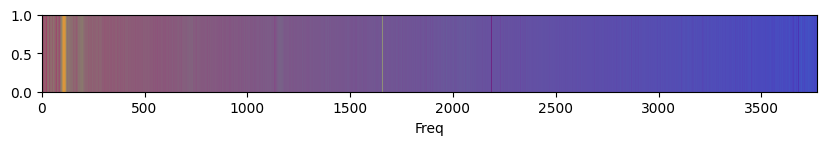

In [189]:
#Special magic to make 2d spectra plots according to the wavelenghts

from matplotlib.colors import Normalize, LinearSegmentedColormap
one_spectra=spectra_list_resized[2]['flux'][:,None]

freq_vs_time=np.linspace(0,one_spectra.shape[0], one_spectra.shape[0])[:,None]
freq_cmap = LinearSegmentedColormap.from_list('freq_cmap', ['red', 'blue'], N=one_spectra.shape[0])

norm_intensity = Normalize(vmin=one_spectra.min(), vmax=one_spectra.max())


fig, ax = plt.subplots(figsize=(10,1))

# Plot the frequency values with the frequency-based colormap
# Use pcolormesh to create the base layer
p = ax.pcolormesh(freq_vs_time.T, cmap=freq_cmap, shading='auto', alpha=0.7)

# Overlay the intensity values
# Use a different colormap for intensity
im = ax.pcolormesh(one_spectra.T, alpha=0.5, norm=norm_intensity)
ax.set_xlabel("Freq")

